In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import load_iris
from torch import nn, optim

In [16]:
"""
２クラスのロジスティック回帰
"""

iris = load_iris()

# irisデータの前方100個のみを使うことで、2クラス分類として考える
X = torch.tensor(iris.data[:100], dtype=torch.float32)
y = torch.tensor(iris.target[:100], dtype=torch.float32)

# サイズ確認
print(f'X size: {X.size()}')
print(f'y size: {y.size()}')

# model構築
net = nn.Linear(in_features=4, out_features=1)
criterion = nn.BCEWithLogitsLoss()  # 勝手にSigmoid関数の適用をしてくれるので若干罠
optimizer = optim.SGD((net.parameters()), lr=0.25)

X size: torch.Size([100, 4])
y size: torch.Size([100])


In [17]:
# 学習
num_epochs = 100
loss_list = []

for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()
    
    y_pred = net(X)
    
    loss = criterion(y_pred.view_as(y), y)
    
    # 勾配計算
    loss.backward()
    
    loss_list.append(loss.item())
    
    optimizer.step()

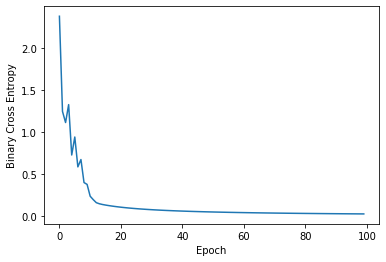

In [18]:
# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy')
plt.show()

In [19]:
# 予測確率の確認
y_prob = torch.sigmoid(net(X))
print(y_prob.view(-1, ))

# 予測ラベルの確認
labels_pred = (y_prob >= 0.5)
print(labels_pred.numpy().astype(int).ravel())

tensor([0.0181, 0.0358, 0.0251, 0.0445, 0.0168, 0.0238, 0.0289, 0.0262, 0.0499,
        0.0344, 0.0154, 0.0352, 0.0329, 0.0220, 0.0047, 0.0075, 0.0103, 0.0206,
        0.0206, 0.0177, 0.0333, 0.0227, 0.0087, 0.0619, 0.0647, 0.0515, 0.0415,
        0.0213, 0.0195, 0.0465, 0.0500, 0.0284, 0.0091, 0.0065, 0.0390, 0.0178,
        0.0123, 0.0154, 0.0362, 0.0251, 0.0175, 0.0877, 0.0286, 0.0475, 0.0460,
        0.0424, 0.0192, 0.0322, 0.0161, 0.0240, 0.9839, 0.9835, 0.9921, 0.9862,
        0.9914, 0.9903, 0.9897, 0.9263, 0.9868, 0.9788, 0.9677, 0.9805, 0.9774,
        0.9925, 0.9333, 0.9766, 0.9909, 0.9696, 0.9955, 0.9707, 0.9953, 0.9672,
        0.9971, 0.9914, 0.9774, 0.9801, 0.9926, 0.9960, 0.9904, 0.9130, 0.9694,
        0.9574, 0.9644, 0.9981, 0.9917, 0.9846, 0.9890, 0.9915, 0.9729, 0.9824,
        0.9903, 0.9895, 0.9742, 0.9314, 0.9846, 0.9738, 0.9796, 0.9793, 0.8596,
        0.9777], grad_fn=<ViewBackward>)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0